In [1]:
#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['ggplot'])

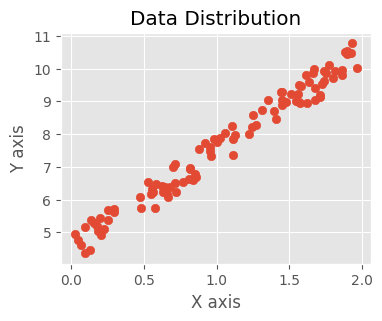

In [2]:
#read data

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.title("Data Distribution")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [3]:
#linear regression

from sklearn.linear_model import LinearRegression

In [4]:
linear_model = LinearRegression()
linear_model.fit(x,y)

b = linear_model.intercept_
m = linear_model.coef_

print('intercept:', b)
print('slope:', m)

intercept: [4.55671531]
slope: [[2.99471686]]


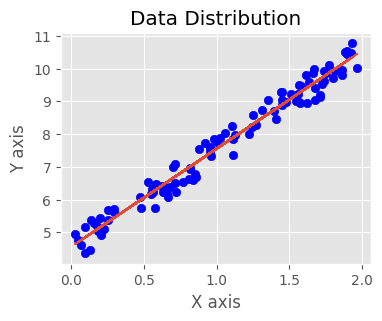

In [5]:
plt.figure(figsize=(4,3))
plt.scatter(x,y, color='blue')
plt.plot(x,m*x+b)
plt.title("Data Distribution")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [6]:
#gradient descent

#initialization
lr = 0.01 #learning rate
n_iter = 400
theta = np.random.randn(2,1)
n = len(y)

#create vector to save history
cost_history = np.zeros(n_iter)
theta_history = np.zeros((n_iter, 2))

#loop
x_b = np.c_[np.ones((len(x),1)),x]
for i in range(n_iter):
  m = theta[1][0]
  b = theta[0][0]
  prediction = b + m*x
  error = prediction-y
  gradient = (1/n) * x_b.T.dot(error)
  theta = theta - lr * gradient
  cost = (1/n) * np.sum(np.square(error))
  cost_history[i] = cost
  theta_history[i] = theta.T

print('intercept:', b)
print('slope:', m)
print('cost:', cost)

intercept: 3.40392374590049
slope: 3.9219587761315675
cost: 0.40536483066154766


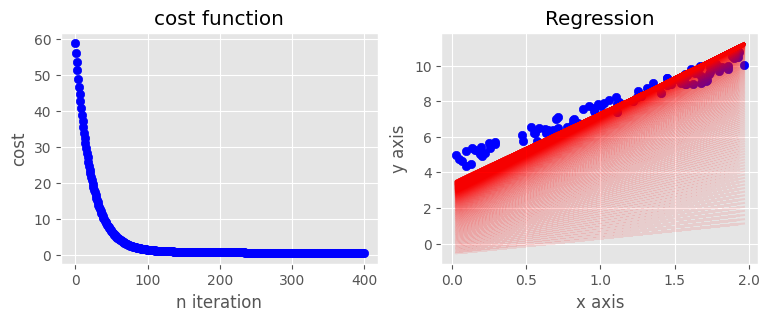

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))
ax1.scatter(range(n_iter), cost_history, color='blue')
ax1.set_title('cost function')
ax1.set_xlabel('n iteration')
ax1.set_ylabel('cost')

ax2.scatter(x,y,color='blue')
ax2.set_title('Regression')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
for i in range(n_iter):
  b = theta_history[i][0]
  m = theta_history[i][1]
  ax2.plot(x, m*x+b, color='red', alpha=0.1)

In [8]:
#stochastic gradient descent

#initialization
lr = 0.01 #learning rate
n_iter = 400
theta = np.random.randn(2,1)
n = len(y)

#create vector to save history
cost_history = np.zeros(n_iter)
theta_history = np.zeros((n_iter, 2))

#loop
x_b = np.c_[np.ones((len(x),1)),x]
for i in range(n_iter):
  cost = 0.0
  for j in range(n):
    rand_num = np.random.randint(0,n)
    x_i = x_b[rand_num,:].reshape(1,x_b.shape[1])
    y_i = y[rand_num].reshape(1,1)
    prediction = np.dot(x_i,theta) #sama dengan mx+b

    error = prediction-y_i
    gradient = (1/n) * x_i.T.dot(error)
    theta = theta - lr * gradient
    cost += (1/n) * np.sum(np.square(error))

  cost_history[i] = cost
  theta_history[i] = theta.T

print('intercept:', b)
print('slope:', m)
print('cost:', cost)

intercept: 3.405621936777982
slope: 3.920604882337321
cost: 0.2544296483679162


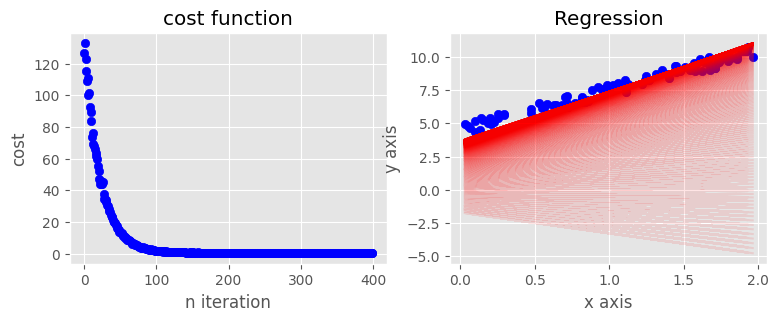

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))
ax1.scatter(range(n_iter), cost_history, color='blue')
ax1.set_title('cost function')
ax1.set_xlabel('n iteration')
ax1.set_ylabel('cost')

ax2.scatter(x,y,color='blue')
ax2.set_title('Regression')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
for i in range(n_iter):
  b = theta_history[i][0]
  m = theta_history[i][1]
  ax2.plot(x, m*x+b, color='red', alpha=0.1)

In [10]:
np.random.permutation(n)

array([67, 81, 16, 99, 84, 66, 20, 87,  5, 78, 27, 44, 91, 13, 29, 79, 82,
       53, 49, 33, 17, 77, 64, 83, 32,  1, 46, 48, 37,  4,  7, 93, 94, 10,
       74, 63, 40, 98,  3, 76, 39,  8, 30, 85, 36, 14, 12, 71, 88, 96, 45,
       92,  0, 65,  6,  9, 55, 90, 89, 50, 19, 58, 24,  2, 80, 95, 43, 72,
       23, 25, 62, 21, 73, 26, 56, 59, 22, 97, 38, 60, 51, 68, 35, 47, 75,
       61, 11, 31, 57, 34, 18, 70, 54, 86, 69, 41, 28, 42, 15, 52])

In [11]:
#mini batch gradient descent

#initialization
lr = 0.01 #learning rate
n_iter = 400
theta = np.random.randn(2,1)
n = len(y)
batch_size = 20

#create vector to save history
cost_history = np.zeros(n_iter)
theta_history = np.zeros((n_iter, 2))

#loop
x_b = np.c_[np.ones((len(x),1)),x]
for i in range(n_iter):
  cost = 0.0
  indices = np.random.permutation(n)
  x_r = x_b[indices]
  y_r = y[indices]
  for j in range(0,n,batch_size):
    x_i = x_r[i:i+batch_size]
    y_i = y_r[i:i+batch_size]

    prediction = np.dot(x_i,theta) #sama dengan mx+b

    error = prediction-y_i
    gradient = (1/n) * x_i.T.dot(error)
    theta = theta - lr * gradient
    cost += (1/n) * np.sum(np.square(error))

  cost_history[i] = cost
  theta_history[i] = theta.T

print('intercept:', b)
print('slope:', m)
print('cost:', cost)

intercept: 3.6788926044680887
slope: 3.6920926722794474
cost: 0.0


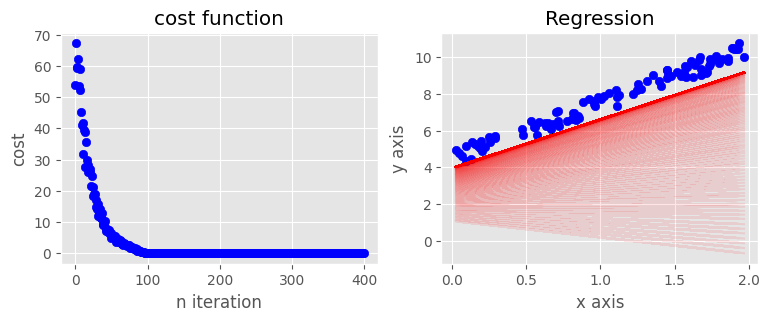

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))
ax1.scatter(range(n_iter), cost_history, color='blue')
ax1.set_title('cost function')
ax1.set_xlabel('n iteration')
ax1.set_ylabel('cost')

ax2.scatter(x,y,color='blue')
ax2.set_title('Regression')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
for i in range(n_iter):
  b = theta_history[i][0]
  m = theta_history[i][1]
  ax2.plot(x, m*x+b, color='red', alpha=0.1)

In [13]:
b = theta[0][0]
m = theta[1][0]
print('intercept:', b)
print('slope:', m)

intercept: 3.9494008945538757
slope: 2.6587595625265887
